# Machine Learning Final Project - Group 21

## import python packages

In [133]:
# imports

import pandas as pd
import numpy as np
import scipy.stats as st
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# part B - processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.preprocessing import StandardScaler

# part C - modeling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostClassifier

# part D - model evaluation
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc


## import csv

In [76]:
#read train data set from csv

train_set = pd.read_csv(r'C:\Users\Rotem\Documents\personal\Machine Learning\final_project\train.csv')
train_set.head(10)

,id,closeness_to_holiday,B,Month,product_page_duration,BounceRates,info_page_duration,total_duration,device,num_of_admin_pages,...,num_of_info_pages,D,user_type,Region,admin_page_duration,PageValues,A,Weekend,internet_browser,purchase
0,0,0.0,84.958154,Feb,0.0 minutes,0.200000,0.0 minutes,NaN,1.0,0.0,...,0.0,NaN,Returning_Visitor,1.0,0.0,0.0,c_1,0.0,safari_13,0
1,1,0.0,102.100162,Feb,64.0 minutes,0.000000,0.0 minutes,NaN,2.0,0.0,...,0.0,NaN,Returning_Visitor,1.0,0.0,0.0,c_2,0.0,chrome_89,0
2,2,0.0,100.991064,Feb,0.0 minutes,0.200000,0.0 minutes,NaN,4.0,0.0,...,0.0,NaN,Returning_Visitor,9.0,0.0,0.0,c_3,0.0,safari_15,0
3,3,0.0,120.605525,Feb,2.666666667 minutes,0.050000,0.0 minutes,NaN,3.0,0.0,...,0.0,NaN,Returning_Visitor,2.0,0.0,0.0,c_4,0.0,chrome_89,0
4,4,0.0,87.423708,Feb,627.5 minutes,0.020000,0.0 minutes,NaN,3.0,NaN,...,0.0,NaN,Returning_Visitor,1.0,0.0,0.0,c_4,1.0,browser_3_v9,0
5,5,0.0,96.975609,Feb,154.2166667 minutes,0.015789,0.0 minutes,NaN,2.0,0.0,...,0.0,NaN,Returning_Visitor,1.0,0.0,0.0,c_3,0.0,chrome_90.1.7,0
6,6,0.4,107.906236,Feb,0.0 minutes,0.200000,0.0 minutes,NaN,2.0,0.0,...,0.0,NaN,Returning_Visitor,3.0,0.0,0.0,c_3,0.0,edge_97.0.1072.76,0
7,7,0.0,89.358570,Feb,0.0 minutes,0.200000,0.0 minutes,NaN,1.0,1.0,...,0.0,NaN,Returning_Visitor,1.0,0.0,0.0,c_5,1.0,chrome_90.1.7,0
8,8,0.8,91.537433,Feb,37.0 minutes,0.000000,0.0 minutes,37.0,2.0,0.0,...,0.0,NaN,Returning_Visitor,2.0,0.0,0.0,c_3,0.0,chrome_99.1.3,0
9,10,0.0,100.350457,Feb,395.0 minutes,0.000000,0.0 minutes,395.0,1.0,0.0,...,0.0,NaN,Returning_Visitor,3.0,0.0,0.0,c_3,0.0,safari_13,0


In [154]:
#read test data set from csv

test_set = pd.read_csv(r'C:\Users\Rotem\Documents\personal\Machine Learning\final_project\test.csv')
test_set.head(10)

,id,closeness_to_holiday,B,Month,product_page_duration,BounceRates,info_page_duration,total_duration,device,num_of_admin_pages,...,ExitRates,num_of_info_pages,D,user_type,Region,admin_page_duration,PageValues,A,Weekend,internet_browser
0,9,0.4,90.064579,Feb,738.0 minutes,0.000000,0.0 minutes,NaN,2.0,0.0,...,0.022222,0.0,NaN,Returning_Visitor,1.0,0.0,0.0,c_2,0.0,edge_96.0.1054.72
1,11,0.4,103.477432,Feb,407.75 minutes,0.018750,0.0 minutes,NaN,1.0,0.0,...,0.025833,NaN,NaN,Returning_Visitor,4.0,0.0,0.0,c_3,0.0,safari_13
2,22,0.0,97.143903,Feb,105.0 minutes,0.000000,0.0 minutes,NaN,3.0,0.0,...,0.033333,0.0,NaN,Returning_Visitor,1.0,0.0,0.0,c_5,0.0,chrome_98.0.1
3,26,0.0,108.802907,Feb,1135.444444 minutes,0.002857,0.0 minutes,NaN,2.0,4.0,...,0.009524,0.0,NaN,Returning_Visitor,1.0,64.6,0.0,c_3,0.0,chrome_99.1.3
4,51,0.2,119.761133,Feb,265.1666667 minutes,0.011111,0.0 minutes,NaN,3.0,0.0,...,0.026111,0.0,NaN,Returning_Visitor,1.0,0.0,0.0,c_3,0.0,chrome_80
5,73,0.0,105.798467,Feb,426.66666669999995 minutes,0.000000,0.0 minutes,NaN,2.0,0.0,...,0.012500,0.0,NaN,Returning_Visitor,3.0,0.0,0.0,c_2,0.0,edge_96.0.1054.75
6,85,0.0,104.109420,Feb,0.0 minutes,0.200000,0.0 minutes,0.000000,1.0,0.0,...,0.200000,0.0,NaN,Returning_Visitor,1.0,0.0,0.0,NaN,0.0,safari_14
7,89,0.0,102.395184,Feb,620.0333333 minutes,0.000000,0.0 minutes,620.033333,1.0,0.0,...,0.007895,0.0,NaN,Returning_Visitor,4.0,0.0,0.0,c_2,0.0,safari_14
8,97,0.6,124.688096,Feb,NaN,0.000000,0.0 minutes,NaN,1.0,0.0,...,0.025000,0.0,NaN,Returning_Visitor,1.0,0.0,0.0,c_4,0.0,safari_13
9,110,0.6,101.416158,Feb,253.0 minutes,0.000000,0.0 minutes,253.000000,2.0,0.0,...,0.016667,0.0,NaN,Returning_Visitor,3.0,0.0,0.0,c_3,0.0,chrome_99.1.3


# A - exploration

## general info

In [77]:
# data size & types & non-null count

train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10479 entries, 0 to 10478
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     10479 non-null  int64  
 1   closeness_to_holiday   9834 non-null   float64
 2   B                      10456 non-null  float64
 3   Month                  10458 non-null  object 
 4   product_page_duration  9872 non-null   object 
 5   BounceRates            10465 non-null  float64
 6   info_page_duration     10139 non-null  object 
 7   total_duration         5721 non-null   float64
 8   device                 10094 non-null  float64
 9   num_of_admin_pages     10031 non-null  float64
 10  num_of_product_pages   9962 non-null   float64
 11  C                      10461 non-null  object 
 12  ExitRates              10452 non-null  float64
 13  num_of_info_pages      9821 non-null   float64
 14  D                      109 non-null    float64
 15  us

## distribution (numeric factors)

C:\Users\Rotem\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


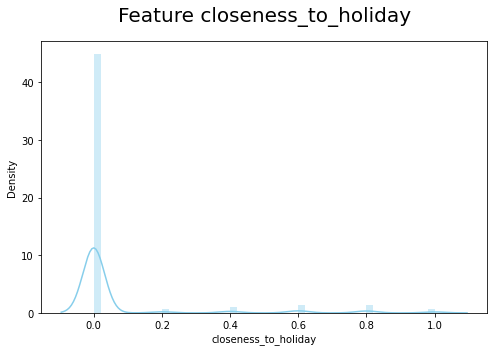

C:\Users\Rotem\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


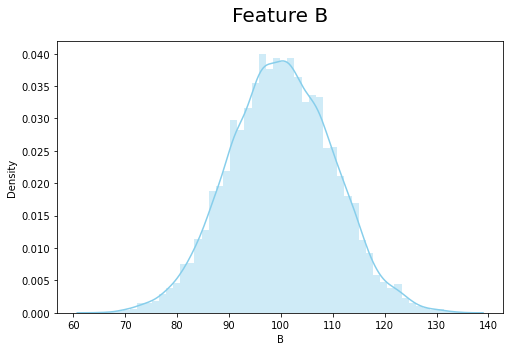

C:\Users\Rotem\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


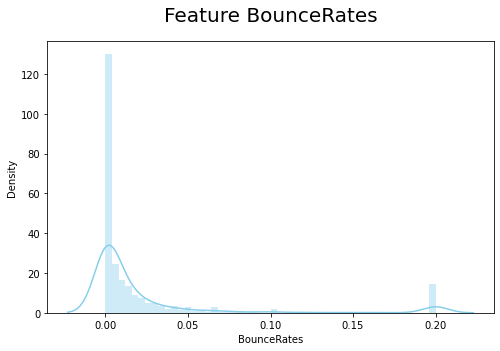

C:\Users\Rotem\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


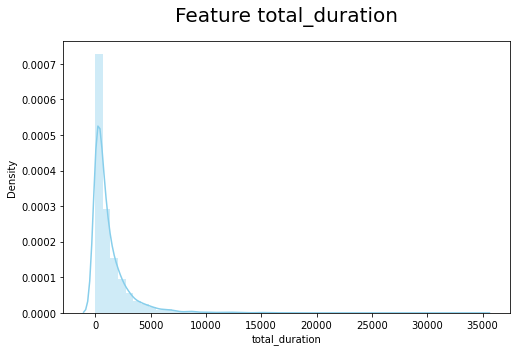

C:\Users\Rotem\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


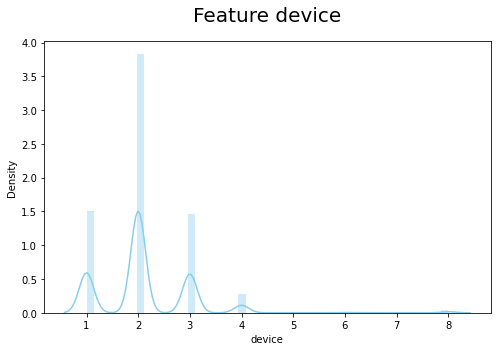

C:\Users\Rotem\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


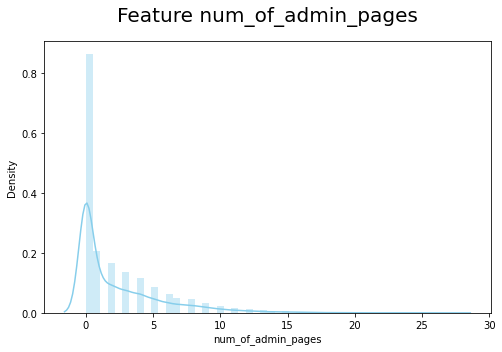

C:\Users\Rotem\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


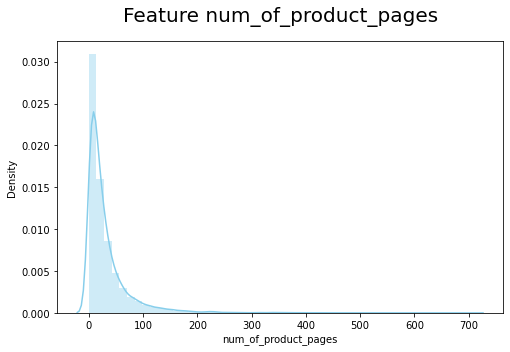

C:\Users\Rotem\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


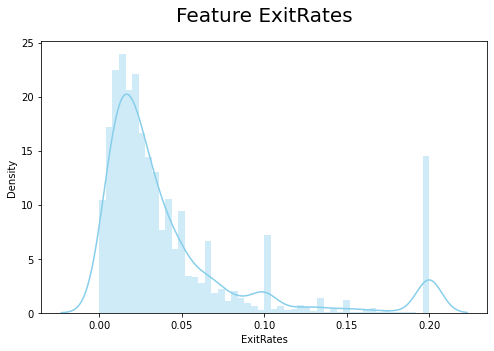

C:\Users\Rotem\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


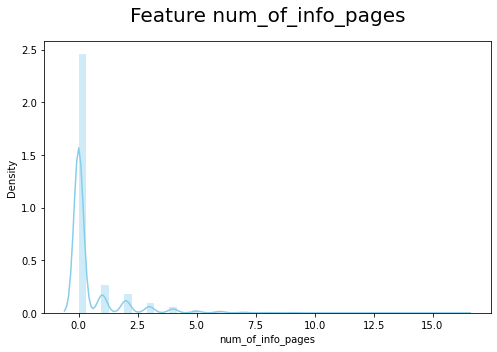

C:\Users\Rotem\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


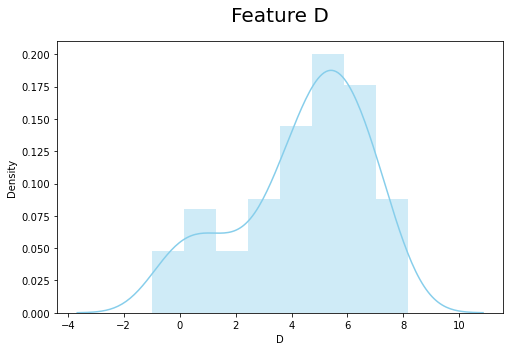

C:\Users\Rotem\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


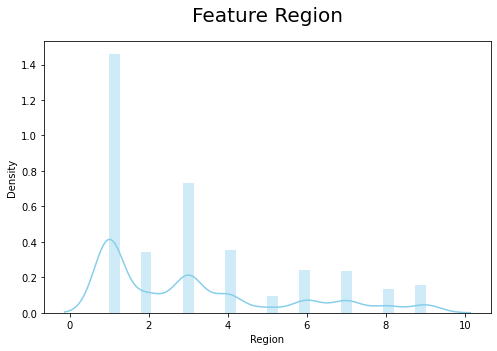

C:\Users\Rotem\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


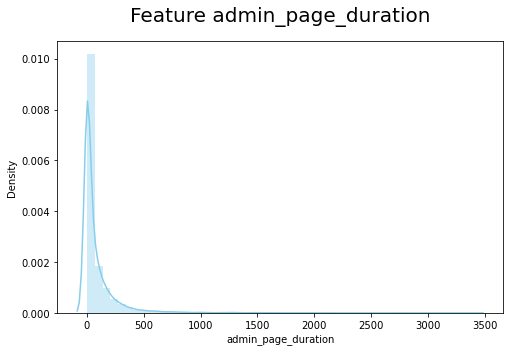

C:\Users\Rotem\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


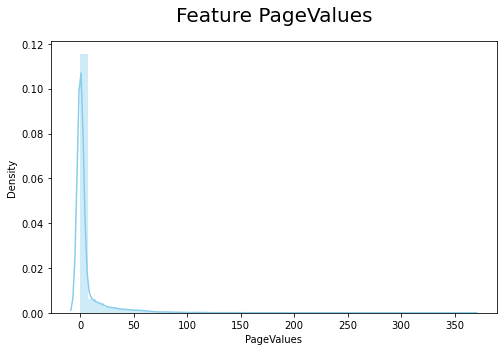

C:\Users\Rotem\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


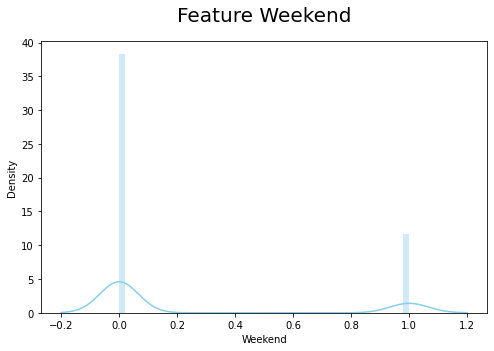

In [78]:
# plot hisogram of numeric factor to see distribution (without distinctive 'id' and target-factor purchase)
relevant_train_set = train_set.loc[:,~train_set.columns.isin(['purchase', 'id'])].select_dtypes(exclude=['object'])
for factor in relevant_train_set: # for each feature
    fig, ax = plt.subplots(figsize=(8,5)) # plot a graph
    plt.title('Feature ' + factor,fontsize = 20, y=1.05)
    ax= sns.distplot(relevant_train_set[factor].dropna(),color="skyblue")
    plt.show()

## distribution (Object factors)

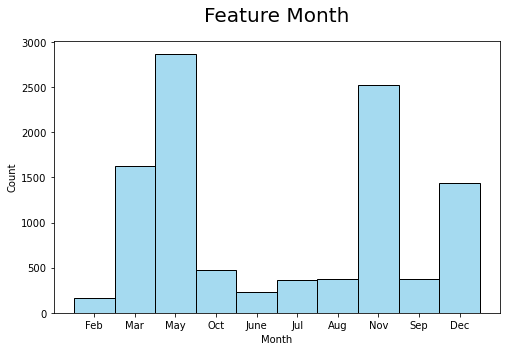

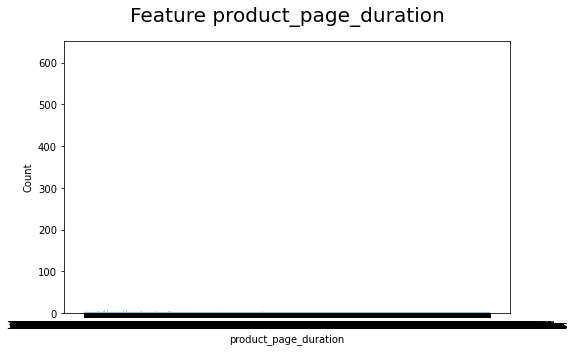

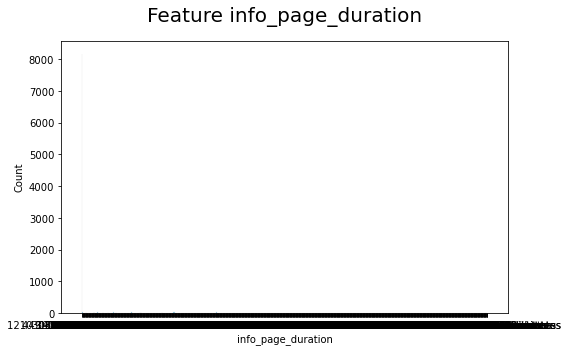

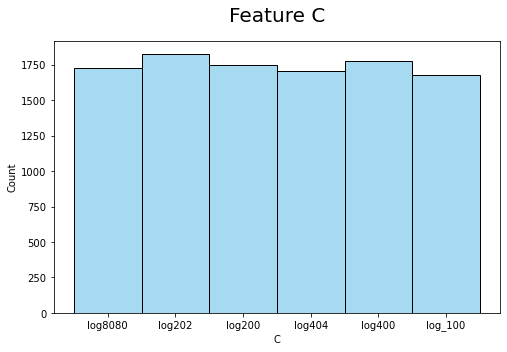

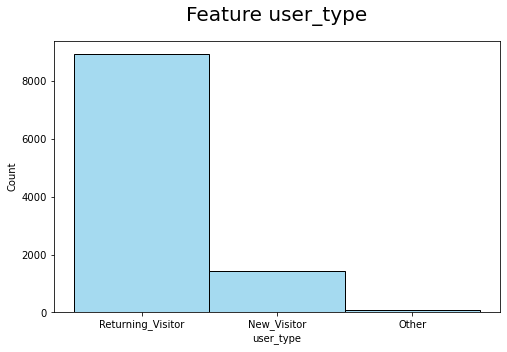

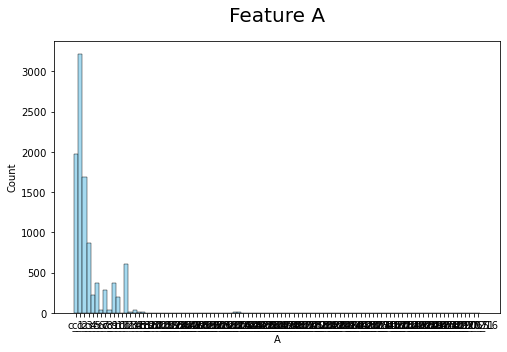

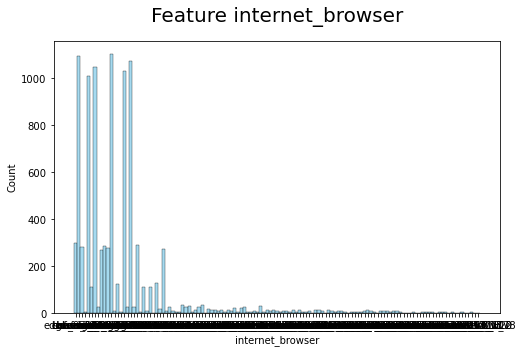

In [79]:
# plot hisogram of numeric factor to see distribution (without distinctive 'id' and target-factor purchase)
relevant_train_set = train_set.select_dtypes(exclude=['float64', 'int64'])
for factor in relevant_train_set: # for each feature
    fig, ax = plt.subplots(figsize=(8,5)) # plot a graph
    plt.title('Feature ' + factor,fontsize = 20, y=1.05)
    ax = sns.histplot(relevant_train_set[factor].dropna(),color="skyblue")
    plt.show()

## balance

<AxesSubplot:ylabel='purchase'>

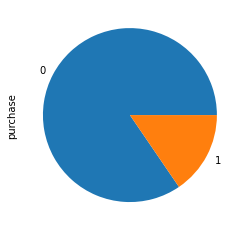

In [80]:
# check target variable balance
# result - imbalanced data - maybe can't check accuracy later. can look at Confusion Metrix.

train_set.purchase.value_counts().plot(kind='pie')

# B - pre - proccesing

## missing data (null values)

### delete rows with many nulls

In [81]:
for i in range(22):
    
    counter = 0 
    for j in range(len(train_set.index)) :
        if train_set.iloc[j].isnull().sum() > i:
            counter +=1
    print (counter, 'rows with', i, 'nulls')

10449 rows with 0 nulls
6933 rows with 1 nulls
2365 rows with 2 nulls
509 rows with 3 nulls
106 rows with 4 nulls
56 rows with 5 nulls
52 rows with 6 nulls
49 rows with 7 nulls
41 rows with 8 nulls
31 rows with 9 nulls
15 rows with 10 nulls
4 rows with 11 nulls
0 rows with 12 nulls
0 rows with 13 nulls
0 rows with 14 nulls
0 rows with 15 nulls
0 rows with 16 nulls
0 rows with 17 nulls
0 rows with 18 nulls
0 rows with 19 nulls
0 rows with 20 nulls
0 rows with 21 nulls


### delete factors with many nulls *

In [82]:
# check nulls
train_set.isna().sum()

id                           0
closeness_to_holiday       645
B                           23
Month                       21
product_page_duration      607
BounceRates                 14
info_page_duration         340
total_duration            4758
device                     385
num_of_admin_pages         448
num_of_product_pages       517
C                           18
ExitRates                   27
num_of_info_pages          658
D                        10370
user_type                   24
Region                      18
admin_page_duration        667
PageValues                  14
A                          389
Weekend                     23
internet_browser           644
purchase                     0
dtype: int64

In [83]:
train_set = train_set.drop(columns=['D'])

## train set dimension

### correlation *

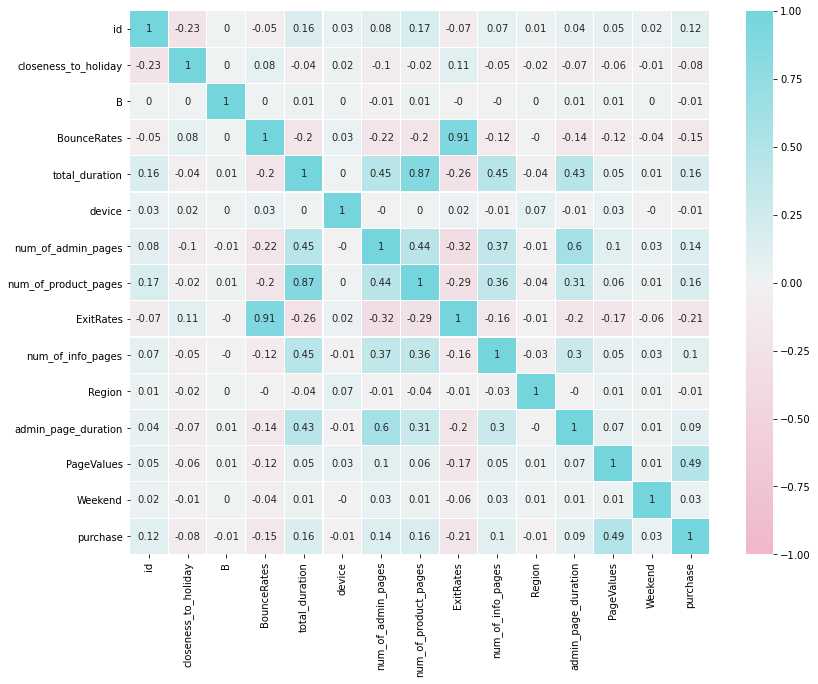

In [84]:
# numeric dtypes

fig = plt.subplots(figsize=(13,10))
cmap = sns.diverging_palette(350, 200, l=80 , s=70, as_cmap=True) # choose the style
sns.heatmap(train_set.corr(), vmin=-1.0, vmax=1.0, center=0 ,cmap=cmap, annot=round(train_set.corr(),2), xticklabels=train_set.corr().columns, yticklabels=train_set.corr().columns, linewidths=0.06, linecolor='white') # plot the graph
plt.show()

In [85]:
# remove total_duration from train_set
train_set = train_set.drop(columns=['ExitRates','total_duration', 'B'])

#check print: train_set['total_duration']

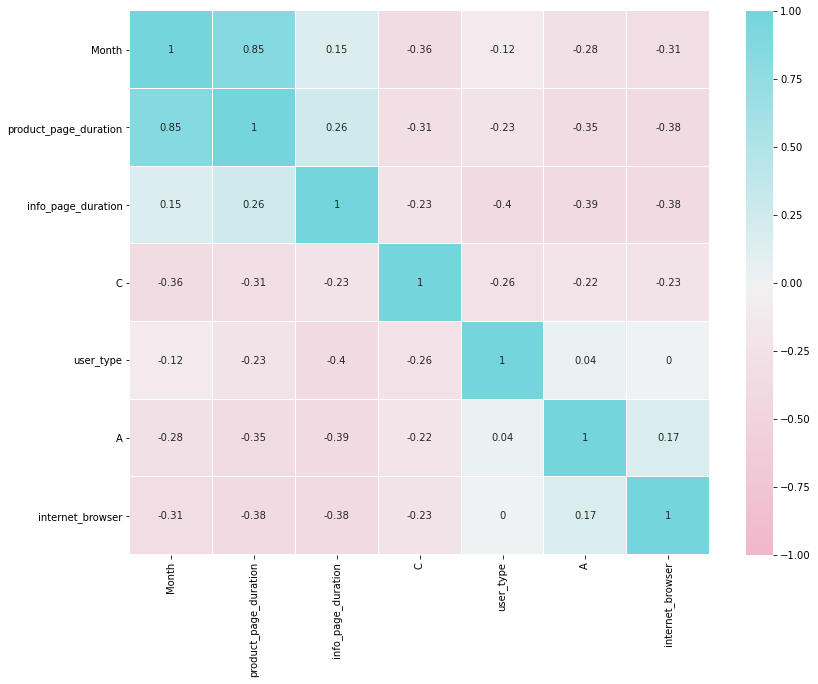

In [86]:
# object dtypes

obj_train_set = train_set.select_dtypes(exclude=['float64','int64']).apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

fig = plt.subplots(figsize=(13,10))
cmap = sns.diverging_palette(350, 200, l=80 , s=70, as_cmap=True) # choose the style
sns.heatmap(obj_train_set.corr(), vmin=-1.0, vmax=1.0, center=0 ,cmap=cmap, annot=round(obj_train_set.corr(),2), xticklabels=obj_train_set.corr().columns, yticklabels=obj_train_set.corr().columns, linewidths=0.06, linecolor='white') # plot the graph
plt.show()


In [87]:
# remove total_duration from train_set
train_set = train_set.drop(columns=['product_page_duration'])

#check print: train_set['product_page_duration']

In [88]:
# remove column 'id' as is has no meaning
train_set = train_set.drop(columns=['id'])

## categorial features (and missing data) *

In [89]:
# one hot encoging function - convert cat columns into multiple binary columns

def one_hot_encoding(train_set, column_name): #function gets df and name of column to one-hot-encode in str
    temp = pd.get_dummies(train_set[column_name], prefix = column_name)  # convert the categorical variable into dummy variable
    train_set = pd.concat([train_set,temp], axis = 1)  # concatenate the new col with the df
    train_set = train_set.drop(columns = [column_name])  # remove the old col
    if 'purchase' in list(train_set.columns):
        train_set=pd.concat([train_set.loc[:,~train_set.columns.isin(['purchase'])],train_set.loc[:,train_set.columns.isin(['purchase'])]],axis=1) # keep 'purchase' last
    return train_set

### consider converting numeric to categorial

In [90]:
consider_num_to_cat = ['Weekend','Region','device','closeness_to_holiday']

for k in consider_num_to_cat:
  print(k,':',train_set[k].unique())

Weekend : [ 0.  1. nan]
Region : [ 1.  9.  2.  3.  4.  5.  6.  7.  8. nan]
device : [ 1.  2.  4.  3. nan  7.  6.  8.  5.]
closeness_to_holiday : [0.  0.4 0.8 1.  nan 0.2 0.6]


In [91]:
# fillna
train_set['Weekend'] = train_set['Weekend'].fillna(train_set['Weekend'].mode().iloc[0])
train_set['Region'] = train_set['Region'].fillna(train_set['Region'].mode().iloc[0])
train_set['device'] = train_set['device'].fillna(train_set['device'].mode().iloc[0])
train_set['closeness_to_holiday'] = train_set['closeness_to_holiday'].fillna(train_set['closeness_to_holiday'].mode().iloc[0])

# one hot encode
num_to_cat = ['Weekend','Region','device','closeness_to_holiday']
for factor in num_to_cat:
    train_set = one_hot_encoding(train_set, factor)

train_set.head(10)

,Month,BounceRates,info_page_duration,num_of_admin_pages,num_of_product_pages,C,num_of_info_pages,user_type,admin_page_duration,PageValues,...,device_6.0,device_7.0,device_8.0,closeness_to_holiday_0.0,closeness_to_holiday_0.2,closeness_to_holiday_0.4,closeness_to_holiday_0.6,closeness_to_holiday_0.8,closeness_to_holiday_1.0,purchase
0,Feb,0.200000,0.0 minutes,0.0,1.0,log8080,0.0,Returning_Visitor,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,Feb,0.000000,0.0 minutes,0.0,2.0,log202,0.0,Returning_Visitor,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
2,Feb,0.200000,0.0 minutes,0.0,1.0,log200,0.0,Returning_Visitor,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
3,Feb,0.050000,0.0 minutes,0.0,2.0,log200,0.0,Returning_Visitor,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
4,Feb,0.020000,0.0 minutes,NaN,10.0,log404,0.0,Returning_Visitor,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
5,Feb,0.015789,0.0 minutes,0.0,19.0,log202,0.0,Returning_Visitor,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
6,Feb,0.200000,0.0 minutes,0.0,1.0,log200,0.0,Returning_Visitor,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
7,Feb,0.200000,0.0 minutes,1.0,0.0,log202,0.0,Returning_Visitor,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
8,Feb,0.000000,0.0 minutes,0.0,2.0,log8080,0.0,Returning_Visitor,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
9,Feb,0.000000,0.0 minutes,0.0,3.0,log404,0.0,Returning_Visitor,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0


### consider converting object to categorial

In [92]:
consider_obj_to_cat = ['user_type','C','Month']

for k in consider_obj_to_cat:
  print(k,':',train_set[k].unique())

user_type : ['Returning_Visitor' 'New_Visitor' nan 'Other']
C : ['log8080' 'log202' 'log200' 'log404' 'log400' 'log_100' nan]
Month : ['Feb' 'Mar' nan 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']


In [93]:
# fillna
train_set['user_type'] = train_set['user_type'].fillna(train_set['user_type'].mode().iloc[0])
train_set['C'] = train_set['C'].fillna(train_set['C'].mode().iloc[0])
train_set['Month'] = train_set['Month'].fillna(train_set['Month'].mode().iloc[0])

# one hot encode
for factor in consider_obj_to_cat:
    train_set = one_hot_encoding(train_set, factor)

train_set.head(10)

,BounceRates,info_page_duration,num_of_admin_pages,num_of_product_pages,num_of_info_pages,admin_page_duration,PageValues,A,internet_browser,Weekend_0.0,...,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,purchase
0,0.200000,0.0 minutes,0.0,1.0,0.0,0.0,0.0,c_1,safari_13,1,...,0,1,0,0,0,0,0,0,0,0
1,0.000000,0.0 minutes,0.0,2.0,0.0,0.0,0.0,c_2,chrome_89,1,...,0,1,0,0,0,0,0,0,0,0
2,0.200000,0.0 minutes,0.0,1.0,0.0,0.0,0.0,c_3,safari_15,1,...,0,1,0,0,0,0,0,0,0,0
3,0.050000,0.0 minutes,0.0,2.0,0.0,0.0,0.0,c_4,chrome_89,1,...,0,1,0,0,0,0,0,0,0,0
4,0.020000,0.0 minutes,NaN,10.0,0.0,0.0,0.0,c_4,browser_3_v9,0,...,0,1,0,0,0,0,0,0,0,0
5,0.015789,0.0 minutes,0.0,19.0,0.0,0.0,0.0,c_3,chrome_90.1.7,1,...,0,1,0,0,0,0,0,0,0,0
6,0.200000,0.0 minutes,0.0,1.0,0.0,0.0,0.0,c_3,edge_97.0.1072.76,1,...,0,1,0,0,0,0,0,0,0,0
7,0.200000,0.0 minutes,1.0,0.0,0.0,0.0,0.0,c_5,chrome_90.1.7,0,...,0,1,0,0,0,0,0,0,0,0
8,0.000000,0.0 minutes,0.0,2.0,0.0,0.0,0.0,c_3,chrome_99.1.3,1,...,0,1,0,0,0,0,0,0,0,0
9,0.000000,0.0 minutes,0.0,3.0,0.0,0.0,0.0,c_3,safari_13,1,...,0,1,0,0,0,0,0,0,0,0


## other proccessing

### check for duplicates

remove duplicate rows is exist.

In [94]:
train_set[train_set.duplicated()]

,BounceRates,info_page_duration,num_of_admin_pages,num_of_product_pages,num_of_info_pages,admin_page_duration,PageValues,A,internet_browser,Weekend_0.0,...,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,purchase
1199,0.0,0.0 minutes,0.0,4.0,0.0,0.0,0.0,c_1,chrome_89,1,...,0,0,0,0,1,0,0,0,0,0
1664,0.2,0.0 minutes,0.0,1.0,0.0,0.0,0.0,c_1,chrome_80,1,...,0,0,0,0,1,0,0,0,0,0
1678,0.2,0.0 minutes,0.0,1.0,0.0,0.0,0.0,c_1,chrome_99.1.4,1,...,0,0,0,0,1,0,0,0,0,0
9727,0.0,0.0 minutes,0.0,2.0,0.0,0.0,0.0,c_3,chrome_99.1.4,0,...,0,0,0,0,0,0,1,0,0,0


### remaining Object features *

In [95]:
consider_obj_to_num = ['internet_browser','A','info_page_duration']

# note - 'product_page_duration' was also nominated to be converted but removed due to correlation earlier.

for k in consider_obj_to_num:
  print(k,':',train_set[k].unique())

internet_browser : ['safari_13' 'chrome_89' 'safari_15' 'browser_3_v9' 'chrome_90.1.7'
 'edge_97.0.1072.76' 'chrome_99.1.3' 'browser_5_v19' 'safari_15.2'
 'safari_14' 'safari_15.4' 'chrome_80' 'browser_3_v18' 'edge_98.0.1108.84'
 'browser_6_v14' 'chrome_98.0.1' nan 'browser_5_v11' 'chrome_99.1.4'
 'browser_5_v20' 'safari_13.1' 'browser_3_v11' 'edge_96.0.1054.72'
 'browser_6_v12' 'edge_99.0.1150.46' 'browser_7_v11' 'edge_96.0.1054.75'
 'browser_6_v16' 'safari_14.1' 'browser_3_v12' 'browser_5_v16'
 'browser_6_v17' 'browser_3_v20' 'browser_6_v11' 'browser_5_v7'
 'browser_5_v14' 'browser_5_v10' 'browser_3_v13' 'browser_8_v14'
 'browser_5_v15' 'browser_5_v17' 'browser_9_v13' 'browser_5_v12'
 'browser_10_v11' 'browser_6_v19' 'browser_6_v15' 'browser_10_v19'
 'browser_8_v11' 'browser_6_v13' 'browser_6_v20' 'browser_5_v8'
 'browser_7_v19' 'browser_5_v9' 'browser_5_v18' 'browser_3_v8'
 'browser_8_v17' 'browser_6_v8' 'browser_7_v18' 'browser_5_v13'
 'browser_3_v14' 'browser_6_v18' 'browser_10_v2

In [96]:
train_set.A.value_counts()

c_2        3214
c_1        1973
c_3        1686
c_4         863
c_13        611
           ... 
c_20_59       1
c_12          1
c_20_35       1
c_20_90       1
c_20_18       1
Name: A, Length: 97, dtype: int64

<AxesSubplot:>

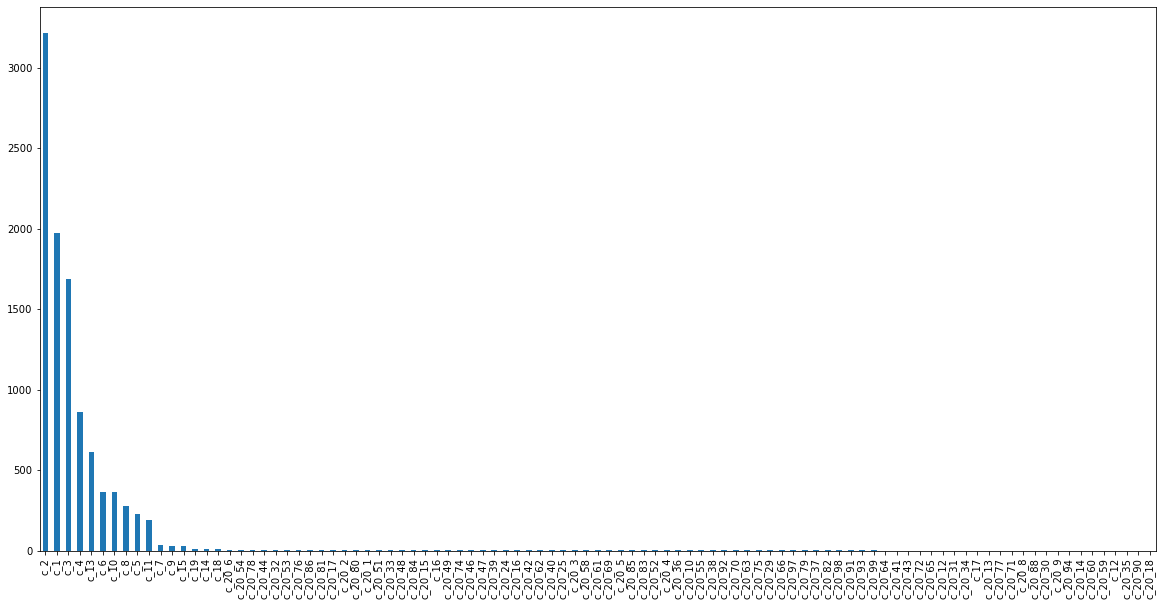

In [97]:
train_set.A.value_counts().plot(kind='bar', figsize=(20,10))

In [98]:
# internet_browser

train_set.loc[train_set['internet_browser'].str.contains('edge') == True, 'internet_browser'] = 'edge'
train_set.loc[train_set['internet_browser'].str.contains('safari') == True, 'internet_browser'] = 'safari'
train_set.loc[train_set['internet_browser'].str.contains('chrome') == True, 'internet_browser'] = 'chrome'
train_set.loc[train_set['internet_browser'].str.contains('browser') == True, 'internet_browser'] = 'browser'
# check print: train_set['internet_browser']

train_set['internet_browser'] = train_set['internet_browser'].fillna(train_set['internet_browser'].mode().iloc[0])

train_set = one_hot_encoding(train_set, 'internet_browser')

In [99]:
# info_page_duration

# check that all durations are of unit 'minutes'
non_min = 0
if train_set['info_page_duration'].str.contains('mintues').any() == True:
    if train_set['info_page_duration'].isnull() == True:
        non_min+=1
# check print: non_min

# change to int
train_set['info_page_duration']= train_set["info_page_duration"].str.slice(0, -7, 1)
train_set['info_page_duration'] = train_set['info_page_duration'].astype(float)
# check print: train_set['info_page_duration']

In [100]:
# A

train_set.loc[train_set['A'].str.contains('c_20_') == True, 'A'] = 'c_20_x'
train_set.loc[(train_set['A']=='c_1') | (train_set['A']=='c_2') | (train_set['A']=='c_3'), 'A'] = 'c_123'
train_set.loc[(train_set['A']!='c_123') & (train_set['A']!='c_20_x'), 'A'] = 'c_x'

# check print: train_set['A']
# check print: train_set.A.value_counts()

train_set['A'] = train_set['A'].fillna(train_set['A'].mode().iloc[0])

train_set = one_hot_encoding(train_set, 'A')

## outliers

In [101]:
numeric_features = list(train_set.select_dtypes(include=['float64', 'int64']).columns)
numeric_features.remove('purchase')
numeric_features

['BounceRates',
 'info_page_duration',
 'num_of_admin_pages',
 'num_of_product_pages',
 'num_of_info_pages',
 'admin_page_duration',
 'PageValues']

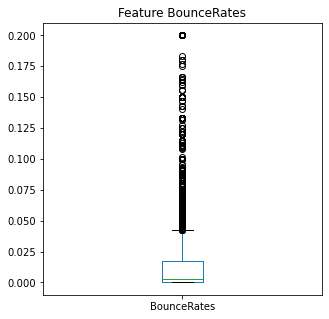

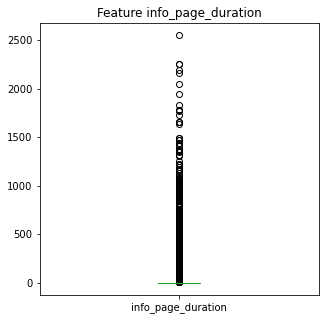

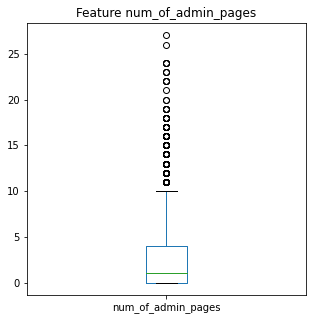

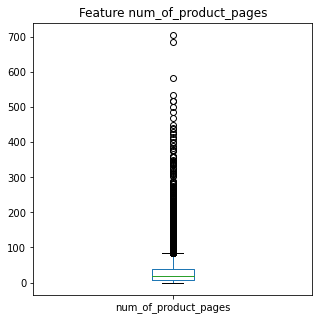

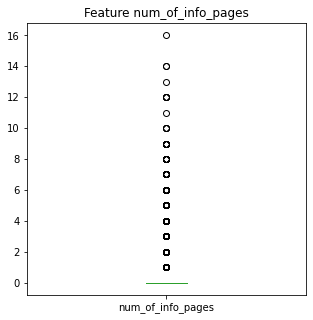

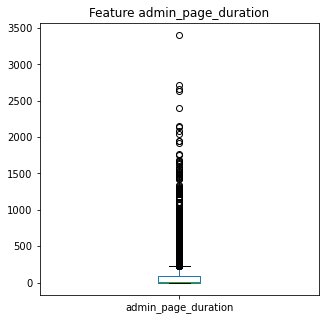

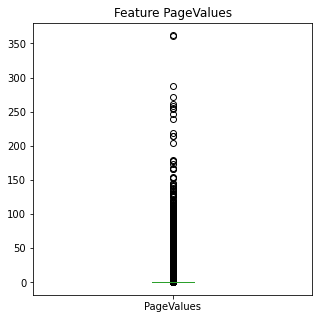

In [102]:
for feature in numeric_features:
    train_set[feature].plot(kind='box', figsize=(5,5))
    plt.title("Feature "+ feature)
    plt.show()

In [103]:
# IQR outliers = values that can be found in (Q1–1.5IQR) or (Q3+1.5IQR).
# Q1 = 25th percentile
# Q3 = 75th percentile
# this function finds all rows that contain "IQR outliers" rows and returns the inputed dataframe wo outlier rows.

def detect_outliers_IQR(train_set):
    # get all numeric columns
    numeric_features = list(train_set.select_dtypes(include=['float64', 'int64']).columns)
    numeric_features.remove('purchase')
    
    #create temp trainset that includes only numeric columns
    temp_train_set = train_set.loc[:,train_set.columns.isin(numeric_features)]
    
    outlier_rows=[]
    for c in temp_train_set.columns:
        temp_train_set[c].dropna()
        Q1 = temp_train_set[c].quantile(.25)
        Q3 = temp_train_set[c].quantile(.75)
        IQR=Q3-Q1
        outlier_rows += list(temp_train_set.loc[(temp_train_set[c]<Q1-1.5*IQR)|(temp_train_set[c]>Q3+1.5*IQR),c].index)
    
    outlier_rows = list(dict.fromkeys(outlier_rows)) # remove duplicates
    new_train_set = train_set.drop(labels=outlier_rows, axis=0)
    return new_train_set

train_set_wo_outliers = detect_outliers_IQR(train_set)
removed_num = train_set.shape[0]-train_set_wo_outliers.shape[0]
removed_per = round(removed_num / train_set.shape[0],3)

print('%s rows have been removed. It is %s of the data set. after removal there will be %s rows in train set.' %(removed_num, removed_per, train_set_wo_outliers.shape[0]))

5313 rows have been removed. It is 0.507 of the data set. after removal there will be 5166 rows in train set.


In [104]:
# z-score outliers = any data point whose Z-score falls out of 3rd standard deviation is an outlier.
# this function finds all rows that contain "z-score outliers" rows and returns the inputed dataframe wo outlier rows.

def detect_outliers_zscore(train_set):
    # get all numeric columns
    numeric_features = list(train_set.select_dtypes(include=['float64', 'int64']).columns)
    numeric_features.remove('purchase')
    
    #create temp trainset that includes only numeric columns
    temp_train_set = train_set.loc[:,train_set.columns.isin(numeric_features)]
    
    outlier_rows=[]
    threshold = 3
    for c in temp_train_set.columns:
        cmean = temp_train_set[c].mean()
        cstd = temp_train_set[c].std()
        temp_train_set[c].dropna()
        outlier_rows += list(temp_train_set.loc[abs((temp_train_set[c]-cmean)/cstd) > threshold,c].index)
    
    outlier_rows = list(dict.fromkeys(outlier_rows)) # remove duplicates
    new_train_set = train_set.drop(labels=outlier_rows, axis=0)
    return new_train_set

train_set_wo_outliers = detect_outliers_zscore(train_set)
removed_num = train_set.shape[0]-train_set_wo_outliers.shape[0]
removed_per = round(removed_num / train_set.shape[0],3)

print('%s rows have been removed. It is %s of the data set. after removal there will be %s rows in train set.' %(removed_num, removed_per, train_set_wo_outliers.shape[0]))

1505 rows have been removed. It is 0.144 of the data set. after removal there will be 8974 rows in train set.


In [105]:
train_set = detect_outliers_zscore(train_set)

## deal with remaining missing data

In [106]:
#check which columns have nulls

nan_col = train_set.columns[train_set.isna().any()].tolist()
for feature in nan_col:
    print (feature,':' , train_set[feature].isna().sum())

BounceRates : 14
info_page_duration : 299
num_of_admin_pages : 384
num_of_product_pages : 453
num_of_info_pages : 567
admin_page_duration : 581
PageValues : 12


In [107]:
#mean
#train_set['??'].fillna(train_set['??'].mean(), inplace=True)

#most frequent
#df = df.fillna(df.mode().iloc[0])

#median 
for feature in nan_col: #for each col in the df
        train_set.loc[:,feature].fillna(train_set.loc[:,feature].median(),inplace=True) #fill the nulls with feature's median

In [108]:
#sanity check
train_set.columns[train_set.isna().any()].tolist()

[]

## data scaling

In [109]:
train_set.describe().T

,count,mean,std,min,25%,50%,75%,max
BounceRates,8974.0,0.011812,0.021917,0.0,0.0,0.001177,0.014286,0.166667
info_page_duration,8974.0,14.533609,51.353210,0.0,0.0,0.000000,0.000000,451.500000
num_of_admin_pages,8974.0,1.992200,2.673000,0.0,0.0,1.000000,3.000000,12.000000
num_of_product_pages,8974.0,26.823713,27.709646,0.0,8.0,18.000000,34.000000,166.000000
num_of_info_pages,8974.0,0.319924,0.805261,0.0,0.0,0.000000,0.000000,4.000000
admin_page_duration,8974.0,56.741635,97.781859,0.0,0.0,7.000000,75.886310,623.500000
PageValues,8974.0,3.967404,10.756534,0.0,0.0,0.000000,0.000000,62.330356
Weekend_0.0,8974.0,0.765991,0.423402,0.0,1.0,1.000000,1.000000,1.000000
Weekend_1.0,8974.0,0.234009,0.423402,0.0,0.0,0.000000,0.000000,1.000000
Region_1.0,8974.0,0.388121,0.487350,0.0,0.0,0.000000,1.000000,1.000000


In [110]:
def normalization_func(train_set):
    rows = train_set.index
    cols = train_set.columns
    
    minmax_scaler = MinMaxScaler() # initialize scaler
    minmax_scaler.fit(train_set) # fit scaler
    
    new_train_set = pd.DataFrame(minmax_scaler.transform(train_set), columns = cols, index = rows) # transform train set using the scaler with original cols and indexes.
    return new_train_set

check_normalization = normalization_func(train_set)

In [111]:
check_normalization.describe().T

,count,mean,std,min,25%,50%,75%,max
BounceRates,8974.0,0.070869,0.131503,0.0,0.000000,0.007059,0.085714,1.0
info_page_duration,8974.0,0.032190,0.113739,0.0,0.000000,0.000000,0.000000,1.0
num_of_admin_pages,8974.0,0.166017,0.222750,0.0,0.000000,0.083333,0.250000,1.0
num_of_product_pages,8974.0,0.161589,0.166926,0.0,0.048193,0.108434,0.204819,1.0
num_of_info_pages,8974.0,0.079981,0.201315,0.0,0.000000,0.000000,0.000000,1.0
admin_page_duration,8974.0,0.091005,0.156827,0.0,0.000000,0.011227,0.121710,1.0
PageValues,8974.0,0.063651,0.172573,0.0,0.000000,0.000000,0.000000,1.0
Weekend_0.0,8974.0,0.765991,0.423402,0.0,1.000000,1.000000,1.000000,1.0
Weekend_1.0,8974.0,0.234009,0.423402,0.0,0.000000,0.000000,0.000000,1.0
Region_1.0,8974.0,0.388121,0.487350,0.0,0.000000,0.000000,1.000000,1.0


In [112]:
def standardization_func(train_set):
    data_for_stand = train_set.loc[:,~train_set.columns.isin(['purchase'])] # dont normalize ""
    purchase = pd.DataFrame(train_set['purchase'])
    train_set_wo_cat = data_for_stand.select_dtypes(exclude='uint8') #df without binary columns
    train_set_cat = train_set.select_dtypes(include='uint8')
    
    rows = train_set.index
    cols = train_set_wo_cat.columns
    
    standard_scaler = StandardScaler() # initialize scaler
    standard_scaler.fit(train_set_wo_cat) # fit scaler
    
    new_train_set = pd.DataFrame(standard_scaler.transform(train_set_wo_cat), columns = cols, index = rows)
    new_train_set = pd.concat([new_train_set, train_set_cat], axis=1) # concat normalized non-binary columns with binary columns
    new_train_set = pd.concat([new_train_set, purchase], axis=1) # concat normalized df with 'puchase' column

    return new_train_set

check_standartization = standardization_func(train_set)

In [113]:
check_standartization.describe().T

,count,mean,std,min,25%,50%,75%,max
BounceRates,8974.0,1.599889e-15,1.000056,-0.538946,-0.538946,-0.485263,0.112893,7.065839
info_page_duration,8974.0,-2.865251e-17,1.000056,-0.283028,-0.283028,-0.283028,-0.283028,8.509512
num_of_admin_pages,8974.0,-3.399455e-16,1.000056,-0.745346,-0.745346,-0.371214,0.377051,3.744241
num_of_product_pages,8974.0,-1.213909e-15,1.000056,-0.968082,-0.679358,-0.318452,0.258996,5.022946
num_of_info_pages,8974.0,-7.104537e-15,1.000056,-0.397315,-0.397315,-0.397315,-0.397315,4.570296
admin_page_duration,8974.0,-2.431876e-16,1.000056,-0.580320,-0.580320,-0.508728,0.195801,5.796473
PageValues,8974.0,-1.511098e-15,1.000056,-0.368857,-0.368857,-0.368857,-0.368857,5.426116
Weekend_0.0,8974.0,7.659906e-01,0.423402,0.000000,1.000000,1.000000,1.000000,1.000000
Weekend_1.0,8974.0,2.340094e-01,0.423402,0.000000,0.000000,0.000000,0.000000,1.000000
Region_1.0,8974.0,3.881212e-01,0.487350,0.000000,0.000000,0.000000,1.000000,1.000000


In [114]:
train_set = normalization_func(train_set)

## PCA

In [115]:
#this function receives DataSet and the rate of explained variance desired.
#it returns:
    #1 the DataSet after apply PCA and achiveing desired explained variance rate
    #2 the new DataSet's explained variance (should be as desired)
    #3 new DataSet's components

def PCA_func(df,explained_variance):
    pca = PCA(explained_variance) # initialize PCA with wanted explained variance
    pca.fit(df) # fit the model with our data
    new_df = pd.DataFrame(pca.transform(df),index=df.index) # apply PCA on the data
    new_df_explained_variances = pca.explained_variance_ratio_.cumsum() # percentage of variance explained by each of the selected components
    components = pca.components_
    return new_df, new_df_explained_variances, components

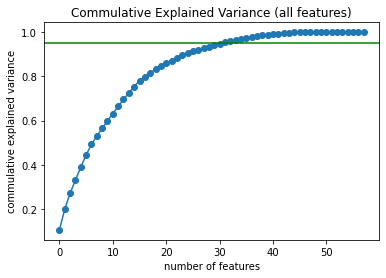

TypeError: not enough arguments for format string

In [116]:
data_for_pca = train_set.loc[:,~train_set.columns.isin(['purchase'])] # adjust data set to pca by removing target factor 'purchase'
irrelevant,current_dataset_PCA,components = PCA_func(data_for_pca, len(data_for_pca.columns)) # aplly PCA_function on our data

# Plot PCA for current train set 
plt.plot(current_dataset_PCA, 'o-')
plt.title('Commulative Explained Variance (all features)')
plt.xlabel('number of features')
plt.ylabel('commulative explained variance')
plt.axhline(0.95, c='g')
plt.show()

In [120]:
# get new train set after applying PCA (removing redundent features)

train_set_pca,explained_var,components = PCA_func(train_set.loc[:,~train_set.columns.isin(['purchase'])],0.95) # apply PCA_func on our data with 0.95 explained variance 
purchase = pd.DataFrame(train_set['purchase']) # keep purchase column for later
train_set = pd.concat([pd.DataFrame(train_set_pca),purchase],axis = 1) # Concat 'purchase' back to train set after applying PCA

In [121]:
train_set.head(5)

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,purchase
1,-0.353933,-0.800049,-0.134761,-0.405204,0.321571,0.379930,-0.099071,0.229909,0.864007,0.110578,...,-0.015618,-0.013105,-0.088178,0.008527,0.015807,-0.007799,0.043851,-0.011789,-0.034341,0.0
3,-0.524864,0.912282,-0.097089,-0.570220,-0.587608,-0.633799,-0.082379,0.366723,-0.267942,-0.491364,...,-0.064056,-0.094954,-0.026181,-0.043678,0.041010,0.005291,0.105066,-0.039969,-0.033569,0.0
4,0.252957,1.320024,0.718896,-0.387592,0.220183,0.465749,-0.261431,0.346753,-0.185122,-0.164959,...,-0.026154,-0.073587,-0.052330,0.050994,-0.000892,-0.003471,0.039070,-0.046816,-0.004360,0.0
5,-0.355921,-0.800370,-0.134987,-0.408978,0.316480,0.382968,-0.107418,0.223002,0.865785,0.110459,...,-0.017469,-0.020499,-0.094130,0.008664,0.023247,-0.004443,0.043723,-0.013380,-0.039217,0.0
8,-0.482661,-0.705674,-0.261014,0.251179,-0.404339,0.169158,0.080843,-0.113256,-0.116456,-0.090677,...,0.015463,-0.111110,-0.071145,-0.020050,0.034997,-0.010104,0.057501,0.036070,-0.163889,0.0


In [122]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8974 entries, 1 to 10478
Data columns (total 33 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   0         8974 non-null   float64
 1   1         8974 non-null   float64
 2   2         8974 non-null   float64
 3   3         8974 non-null   float64
 4   4         8974 non-null   float64
 5   5         8974 non-null   float64
 6   6         8974 non-null   float64
 7   7         8974 non-null   float64
 8   8         8974 non-null   float64
 9   9         8974 non-null   float64
 10  10        8974 non-null   float64
 11  11        8974 non-null   float64
 12  12        8974 non-null   float64
 13  13        8974 non-null   float64
 14  14        8974 non-null   float64
 15  15        8974 non-null   float64
 16  16        8974 non-null   float64
 17  17        8974 non-null   float64
 18  18        8974 non-null   float64
 19  19        8974 non-null   float64
 20  20        8974 non-null   flo

## process test set

In [157]:
# general info about test set - data size & types & non-null count

test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1851 entries, 0 to 1850
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1851 non-null   int64  
 1   closeness_to_holiday   1739 non-null   float64
 2   B                      1845 non-null   float64
 3   Month                  1845 non-null   object 
 4   product_page_duration  1747 non-null   object 
 5   BounceRates            1849 non-null   float64
 6   info_page_duration     1798 non-null   object 
 7   total_duration         1023 non-null   float64
 8   device                 1788 non-null   float64
 9   num_of_admin_pages     1772 non-null   float64
 10  num_of_product_pages   1757 non-null   float64
 11  C                      1847 non-null   object 
 12  ExitRates              1848 non-null   float64
 13  num_of_info_pages      1750 non-null   float64
 14  D                      15 non-null     float64
 15  user

In [158]:
# 1)

for i in range(22):
    counter = 0 
    for j in range(len(test_set.index)) :
        if test_set.iloc[j].isnull().sum() > i:
            counter +=1
    print (counter, 'rows with', i, 'nulls')

1847 rows with 0 nulls
1205 rows with 1 nulls
399 rows with 2 nulls
85 rows with 3 nulls
20 rows with 4 nulls
12 rows with 5 nulls
10 rows with 6 nulls
9 rows with 7 nulls
9 rows with 8 nulls
5 rows with 9 nulls
2 rows with 10 nulls
0 rows with 11 nulls
0 rows with 12 nulls
0 rows with 13 nulls
0 rows with 14 nulls
0 rows with 15 nulls
0 rows with 16 nulls
0 rows with 17 nulls
0 rows with 18 nulls
0 rows with 19 nulls
0 rows with 20 nulls
0 rows with 21 nulls


In [159]:
# (2) + (3) + (4) + (5) 

test_set = test_set.drop(columns=['D'])
test_set = test_set.drop(columns=['ExitRates','total_duration', 'B'])
test_set = test_set.drop(columns=['product_page_duration'])
test_set = test_set.drop(columns=['id'])

In [161]:
# 6)

# fillna
test_set['Weekend'] = test_set['Weekend'].fillna(test_set['Weekend'].mode().iloc[0])
test_set['Region'] = test_set['Region'].fillna(test_set['Region'].mode().iloc[0])
test_set['device'] = test_set['device'].fillna(test_set['device'].mode().iloc[0])
test_set['closeness_to_holiday'] = test_set['closeness_to_holiday'].fillna(test_set['closeness_to_holiday'].mode().iloc[0])

# one hot encode
num_to_cat = ['Weekend','Region','device','closeness_to_holiday']
for factor in num_to_cat:
    test_set = one_hot_encoding(test_set, factor)

In [163]:
# 7)

# fillna
test_set['user_type'] = test_set['user_type'].fillna(test_set['user_type'].mode().iloc[0])
test_set['C'] = test_set['C'].fillna(test_set['C'].mode().iloc[0])
test_set['Month'] = test_set['Month'].fillna(test_set['Month'].mode().iloc[0])

# one hot encode
for factor in consider_obj_to_cat:
    test_set = one_hot_encoding(test_set, factor)

In [165]:
# 8)
test_set[test_set.duplicated()]

,BounceRates,info_page_duration,num_of_admin_pages,num_of_product_pages,num_of_info_pages,admin_page_duration,PageValues,A,internet_browser,Weekend_0.0,...,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep


In [166]:
# 9)

# group similar cat
test_set.loc[test_set['internet_browser'].str.contains('edge') == True, 'internet_browser'] = 'edge'
test_set.loc[test_set['internet_browser'].str.contains('safari') == True, 'internet_browser'] = 'safari'
test_set.loc[test_set['internet_browser'].str.contains('chrome') == True, 'internet_browser'] = 'chrome'
test_set.loc[test_set['internet_browser'].str.contains('browser') == True, 'internet_browser'] = 'browser'

#fillna with most frequent
test_set['internet_browser'] = test_set['internet_browser'].fillna(test_set['internet_browser'].mode().iloc[0])

# convert to cat
test_set = one_hot_encoding(test_set, 'internet_browser')



# group similar cat
test_set.loc[test_set['A'].str.contains('c_20_') == True, 'A'] = 'c_20_x'
test_set.loc[(test_set['A']=='c_1') | (test_set['A']=='c_2') | (test_set['A']=='c_3'), 'A'] = 'c_123'
test_set.loc[(test_set['A']!='c_123') & (test_set['A']!='c_20_x'), 'A'] = 'c_x'

#fillna with most frequent
test_set['A'] = test_set['A'].fillna(test_set['A'].mode().iloc[0])

# convert to cat
test_set = one_hot_encoding(test_set, 'A')

In [170]:
# 10)

# check that all durations are of unit 'minutes'
non_min = 0
if test_set['info_page_duration'].str.contains('mintues').any() == True:
    if test_set['info_page_duration'].isnull() == True:
        non_min+=1

print (non_min)

0


In [171]:
# 10)

# change to int
test_set['info_page_duration']= test_set["info_page_duration"].str.slice(0, -7, 1)
test_set['info_page_duration'] = test_set['info_page_duration'].astype(float)

In [175]:
# 11)

def detect_outliers_zscore_for_test(train_set):
    # get all numeric columns
    numeric_features = list(train_set.select_dtypes(include=['float64', 'int64']).columns)
    
    #create temp trainset that includes only numeric columns
    temp_train_set = train_set.loc[:,train_set.columns.isin(numeric_features)]
    
    outlier_rows=[]
    threshold = 3
    for c in temp_train_set.columns:
        cmean = temp_train_set[c].mean()
        cstd = temp_train_set[c].std()
        temp_train_set[c].dropna()
        outlier_rows += list(temp_train_set.loc[abs((temp_train_set[c]-cmean)/cstd) > threshold,c].index)
    
    outlier_rows = list(dict.fromkeys(outlier_rows)) # remove duplicates
    new_train_set = train_set.drop(labels=outlier_rows, axis=0)
    return new_train_set



test_set = detect_outliers_zscore_for_test(test_set)

In [176]:
# 12)

nan_col = test_set.columns[test_set.isna().any()].tolist()
for feature in nan_col:
        test_set.loc[:,feature].fillna(test_set.loc[:,feature].median(),inplace=True) 

In [179]:
# 13)

test_set = normalization_func(test_set)

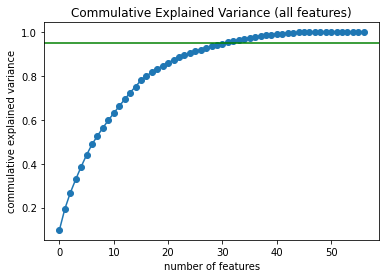

In [181]:
# 14)

irrelevant,current_dataset_PCA,components = PCA_func(test_set, len(test_set.columns)) # aplly PCA_function on our data

# Plot PCA for test set 
plt.plot(current_dataset_PCA, 'o-')
plt.title('Commulative Explained Variance (all features)')
plt.xlabel('number of features')
plt.ylabel('commulative explained variance')
plt.axhline(0.95, c='g')
plt.show()

In [182]:
# 14)

test_set_pca,explained_var,components = PCA_func(test_set,0.95)

test_set = pd.DataFrame(test_set_pca)

In [183]:
# sanity checks
test_set.head(5)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-0.042715,-0.581533,-0.765235,0.376353,0.543997,-0.535121,0.182337,0.271389,-0.123958,-0.427047,...,-0.490875,-0.173673,0.187160,-0.121300,0.118060,0.011964,-0.140740,0.118416,-0.165800,0.023805
1,1.276212,-0.104845,-0.830864,-0.043089,-0.555159,-0.203273,-0.104750,0.262389,0.012711,-0.181969,...,-0.396294,-0.069099,0.035208,-0.044870,0.064338,0.059070,-0.051213,0.006822,0.043755,0.037158
2,-0.220935,0.999945,0.211944,-1.022208,0.485956,-0.184152,0.074479,-0.428075,0.806920,0.066277,...,0.103556,-0.131160,-0.014373,-0.030508,-0.015780,-0.017118,-0.015681,-0.021962,0.068459,-0.042440
3,-0.408928,-0.655382,-0.246397,-0.166784,0.712524,-0.290344,-0.143643,-0.247447,-0.384051,0.568198,...,-0.064708,-0.012142,-0.000414,0.003060,-0.000606,-0.095015,-0.162542,-0.040953,0.053067,0.056186
4,-0.050278,-0.187477,0.044081,-1.163015,0.246597,-0.746835,0.214399,0.183986,-0.097458,-0.309788,...,-0.211139,-0.094206,0.071296,-0.052787,0.036833,0.016169,-0.082026,0.051403,0.019579,-0.072975


In [184]:
# sanity checks
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1576 entries, 0 to 1850
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1576 non-null   float64
 1   1       1576 non-null   float64
 2   2       1576 non-null   float64
 3   3       1576 non-null   float64
 4   4       1576 non-null   float64
 5   5       1576 non-null   float64
 6   6       1576 non-null   float64
 7   7       1576 non-null   float64
 8   8       1576 non-null   float64
 9   9       1576 non-null   float64
 10  10      1576 non-null   float64
 11  11      1576 non-null   float64
 12  12      1576 non-null   float64
 13  13      1576 non-null   float64
 14  14      1576 non-null   float64
 15  15      1576 non-null   float64
 16  16      1576 non-null   float64
 17  17      1576 non-null   float64
 18  18      1576 non-null   float64
 19  19      1576 non-null   float64
 20  20      1576 non-null   float64
 21  21      1576 non-null   float64
 22  

# C - Modeling

## Basic Model - KNN

In [46]:
# check default parametrs
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [126]:
# suggest new parametes for KNN

def KNN_initializer(train_set, k_option):
    
    # split target variable from the other variables
    wo_target_variable = train_set.loc[:,~train_set.columns.isin(['purchase'])]
    only_target_variable = train_set.loc[:,'purchase']
    
    
    # suggest new parameters
    KNN_parameters = {'n_neighbors': k_option, #number of neighbors
                      'weights': ['uniform', 'distance'], #weight function
                      'metric': ['euclidean', 'manhattan','minkowski'], #distance metric
                      'algorithm': ['auto'], #algorithem to compute nearest neighbors. 'auto' will attempt to decide the most appropriate algorithm based on the values passed to fit method
                      'metric_params': [None], #Additional keyword arguments for the metric function
                      'p': [2], #this is the parameter for minkowski' metric. setting it to '2' is equivilat to using euclidean_distance.
                      'leaf_size': [30], #affects the speed of construction and query
                      'n_jobs': [-1] #number of parallel jobs for neighbors search. '-1' means to use all proccessors.
                     }
    
    # grid search
    grid_search = GridSearchCV(KNeighborsClassifier(), KNN_parameters, scoring='roc_auc')
    grid_search.fit(wo_target_variable, only_target_variable)
    
    #print grid search results
    print ('KNN chosen parameters (best AUC score): {%s}' %format(grid_search.best_params_))
    print ("best AUC score: %s" %grid_search.best_score_)
    
    #return best classifier
    clf = KNeighborsClassifier(**grid_search.best_params_) # Using the best parameters
    return clf


#k = [[15,30,45,50],[50,65,75,85],[85,100,115,130]] #k suggestions 1
k = [[85,100,115,130],[130,150,155,170],[170,175,190,205]] #k suggestions
KNN_classifier_options = [] #keep classifiers for k suggestions

for k_option in k:
    KNN_classifier_op = KNN_initializer(train_set, k_option)
    KNN_classifier_options.append(KNN_classifier_op)

KNN chosen parameters (best AUC score): {{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'n_jobs': -1, 'n_neighbors': 130, 'p': 2, 'weights': 'uniform'}}
best AUC score: 0.7317560648299536
KNN chosen parameters (best AUC score): {{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'n_jobs': -1, 'n_neighbors': 170, 'p': 2, 'weights': 'distance'}}
best AUC score: 0.7371469308248123
KNN chosen parameters (best AUC score): {{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'n_jobs': -1, 'n_neighbors': 170, 'p': 2, 'weights': 'distance'}}
best AUC score: 0.7371469308248123


In [128]:
# chosen classifier
KNN_classifier = KNN_classifier_options[2]

## Advanced Model #1 - Multi-Layer Perceptron (ANN)

In [49]:
# check default parametrs
MLPClassifier().get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [124]:
def ANN_initializer(train_set):
    
    # split target variable from the other variables
    wo_target_variable = train_set.loc[:,~train_set.columns.isin(['purchase'])]
    only_target_variable = train_set.loc[:,'purchase']

    
    ANN_parameters = {'activation': ["logistic", "relu", "tanh"], #CHANGED. activation functions
                     'alpha': [0.0001],
                     'batch_size': ['auto'], #Size of minibatches for stochastic optimizers. auto is: min(200, n_samples)
                     'beta_1': [0.9], #parameter for adam solver
                     'beta_2': [0.999], #parameter for adam solver
                     'early_stopping': [False], #Whether to early stopping to terminate training when validation score is not improving (if set False, training will stop when not improving by more then "tol" for "n_iter_no_change" iterations.)
                     'epsilon': [1e-08], #parameter for adam solver
                     'hidden_layer_sizes': #CHANGED. num of layers and num of neurons in each layer
                                          [(100),  # 1 layer of size 100
                                            (50, 50), # 2 layers of size 50
                                            (20, 20, 20)], # 3 layers
                     'learning_rate': ['constant','invscaling','adaptive'], #Learning rate schedule for weight update
                     'learning_rate_init': [0.001], #The initial learning rate used.
                     'max_fun': [15000], #not relevant for 'adam' solver.
                     'max_iter': [1500], #CHANGED. Maximum number of iterations.
                     'momentum': [0.9], #parameter for gradient descent 
                     'n_iter_no_change': [5], #max number of epochs with no improvement (according to "tol" parameter)for adam solver
                     'nesterovs_momentum': [True], #irrelevant for adam solver
                     'power_t': [0.5], #irrelevant for adam solver
                     'random_state': [None], #relevant only for early_stopping = True
                     'shuffle': [True], # shuffle samples in each iteration for solver
                     'solver': ['adam'], # solver for weight optimization - we chose to stay with default.
                     'tol': [0.0001], #toleranve for improvment
                     'validation_fraction': [0.1], #relevant only for early_stopping = True
                     'verbose': [False], #don't print progress messages
                     'warm_start': [False]} #When set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution.
    

    grid_search = GridSearchCV(MLPClassifier(), ANN_parameters, scoring='roc_auc') # grid search
    grid_search.fit(wo_target_variable, only_target_variable) # find the best parameters for the model
    print ('Artificial Neural Network chosen parameters (best AUC score): {%s}' %format(grid_search.best_params_))
    print ('best AUC score: %s' %grid_search.best_score_)
    classifier = MLPClassifier(**grid_search.best_params_)
    return classifier
    
ANN_classifier = ANN_initializer(train_set)

Artificial Neural Network chosen parameters (best AUC score): {{'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (20, 20, 20), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1500, 'momentum': 0.9, 'n_iter_no_change': 5, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}}
best AUC score: 0.8812642266691437


In [125]:
ANN_classifier

MLPClassifier(activation='logistic', hidden_layer_sizes=(20, 20, 20),
              max_iter=1500, n_iter_no_change=5)

## Advanced Model #2 - Decision Tree

In [50]:
# check default parametrs
DecisionTreeClassifier().get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [123]:
def DecisionTree_initializer(train_set):
    
    # split target variable from the other variables
    wo_target_variable = train_set.loc[:,~train_set.columns.isin(['purchase'])]
    only_target_variable = train_set.loc[:,'purchase']
    

    DT_parameters = {'ccp_alpha': [0.0], # Complexity parameter used for Minimal Cost-Complexity Pruning
                     'class_weight': [None], # when 'None' all classes are supposed to have weight one
                     'criterion': ['gini', 'entropy', 'log_loss'], # function that measures the quality of a split
                     'max_depth': [None], # maximum depth of the tree
                     'max_features': [None], # The number of features to consider when looking for the best split
                     'max_leaf_nodes': [None],  # grow a tree with max_leaf_nodes in best-first fashion
                     'min_impurity_decrease': [1e-5, 1e-10, 0], # A node will be split if this split induces a decrease of the impurity greater than or equal to this value
                     'min_impurity_split':[None],
                     'min_samples_leaf': [1, 4, 7, 10], # The minimum number of samples required to be at a leaf node.
                     'min_samples_split': [2, 10, 15, 20, 25, 200], # The minimum number of samples required to split an internal node
                     'min_weight_fraction_leaf': [0.0], # The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node.
                     'random_state': [None], # Controls the randomness of the estimator
                     'splitter': ['best', 'random'],} # strategy used to choose the split at each node
    
    kfold = KFold(n_splits = 4, random_state = 20, shuffle = True)
    grid_search = GridSearchCV(DecisionTreeClassifier(), DT_parameters, cv = kfold, scoring='f1') # grid search
    grid_search.fit(wo_target_variable, only_target_variable) # find the best parameters for the model
    print ('Decision Tree chosen parameters (best score): {%s}' %format(grid_search.best_params_))
    print ('best AUC score: %s' %grid_search.best_score_)
    classifier = DecisionTreeClassifier(**grid_search.best_params_)
    return classifier
    
DecisionTree_classifier = DecisionTree_initializer(train_set)

C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
T

C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
T

C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
T

C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
T

C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
T

C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
T

C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
T

C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
T

C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
T

C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
T

C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
T

C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
T

C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
T

C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
T

C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
T

C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
T

C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
T

C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
T

C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
T

C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
T

C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
T

C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
T

C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
T

C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
T

C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Rotem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
T

Decision Tree chosen parameters (best AUC score): {{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 1e-05, 'min_impurity_split': None, 'min_samples_leaf': 4, 'min_samples_split': 200, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}}
best AUC score: 0.5318217573288428


## Advanced Model #3 - Adaptive Boosting

In [65]:
AdaBoostClassifier().get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [63]:
def AdaBoost_initializer(train_set):
    
    # split target variable from the other variables
    wo_target_variable = train_set.loc[:,~train_set.columns.isin(['purchase'])]
    only_target_variable = train_set.loc[:,'purchase']

    
    AB_parameters = {'algorithm': ['SAMME.R'],
                     'base_estimator': [None], # base estimator from which the boosted ensemble is built
                     'learning_rate': [0.35, 0.5, 1.0, 1.5, 2.0], # CHNAGED. Weight applied to each classifier at each boosting iteration
                     'n_estimators': [25, 30, 35, 50, 75, 80], # CHNAGED. max num of estimators to terminate boosting (stoppes early in case of perfect fit)
                     'random_state': [None]} # relevant only when base_estimator != None
    

    grid_search = GridSearchCV(AdaBoostClassifier(), AB_parameters, scoring='roc_auc') # grid search
    grid_search.fit(wo_target_variable, only_target_variable) # find the best parameters for the model
    print ('Adaptive Boostraping chosen parameters (best AUC score): {%s}' %format(grid_search.best_params_))
    print ('best AUC score: %s' %grid_search.best_score_)
    classifier = AdaBoostClassifier(**grid_search.best_params_)
    return classifier

    
AdaBoost_classifier = AdaBoost_initializer(train_set)

Adaptive Boostraping chosen parameters (best AUC score): {{'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 0.5, 'n_estimators': 75, 'random_state': None}}
best AUC score: 0.8590859275784405


# D - Model Evaluation

## confusion matrix

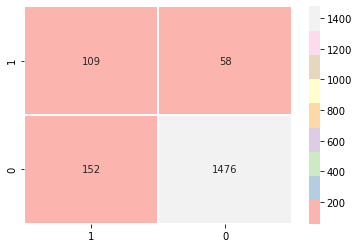

In [67]:
# confusion matrix for Adaptive Boosting model

# this function gets a classifier, data set and the labels and plot the confusion matrix
def Confusion_Mat(classifier, train_set): # the params are classifier, 
    
    # split target variable from the other variables
    wo_target_variable = train_set.loc[:,~train_set.columns.isin(['purchase'])]
    only_target_variable = train_set.loc[:,'purchase']

    
    # split the data to create a validation set - validation size 20%, train size 80%        
    x_train, x_validation, y_train, y_validation = train_test_split(wo_target_variable,only_target_variable,test_size=0.2,shuffle=True,random_state=42)
    
    # fit the model using the train set
    classifier.fit(x_train, y_train)
    y_predict = classifier.predict(x_validation) # predictions for validation set
    cm = confusion_matrix(y_validation, y_predict)
    
    tn, fp, fn, tp = cm.ravel() # get an array of the cm values
    cm_values = [tp,fp,fn,tn]
    matrix = np.array([[tp,fp],[fn,tn]])
    return matrix

confusion_mat = Confusion_Mat(AdaBoost_classifier,train_set)
ax = sns.heatmap(confusion_mat, xticklabels=np.array([1,0]), yticklabels=np.array([1,0]), cmap='Pastel1', linewidth=0.5,annot=True,fmt = '')
plt.show()

## Cross Validation

In [144]:
# this function gets train_set, classifier and k (num to split by)
# and returns a ROC plot, mean of AUC values for train and validation.

def Cross_Validation(train_set, classifier, k): # function who plot ROC 
    
    # split target variable from the other variables
    wo_target_variable = train_set.loc[:,~train_set.columns.isin(['purchase'])]
    only_target_variable = train_set.loc[:,'purchase']
    
    # creat the k-folds
    k_fold = KFold(n_splits=k, shuffle=False)

    # create parameters to keep means for true positive rate in train or validation
    mean_tpr_train = 0
    mean_tpr_validation = 0

    # create arrays for false positive rate in train or validation
    mean_fpr_train = np.linspace(0, 1, 100)
    mean_fpr_validation = np.linspace(0, 1, 100)
    
    # loop through all splits and assign different "train" each time.
    # in each loop get auc score and ROC plot.
    for train_indicies, validation_indicies in k_fold.split(wo_target_variable):
        x_train = wo_target_variable.iloc[train_indicies]
        x_validate = wo_target_variable.iloc[validation_indicies]
        y_train = only_target_variable.iloc[train_indicies]
        y_validate = only_target_variable.iloc[validation_indicies]
        classifier.fit(x_train, y_train) # fit classifier
        
        predict_train = classifier.predict_proba(x_train)[:, 1]  # probability to get 1
        fpr_train, tpr_train, thresholds_train = roc_curve(y_train, predict_train)
        mean_tpr_train += np.interp(mean_fpr_train, fpr_train, tpr_train) / k # update mean_tpr_train

        pred_validation = classifier.predict_proba(x_validate)[:, 1] # probability to '1'
        fpr_validate, tpr_validate, thresholds_validate = roc_curve(y_validate, pred_validation)
        plt.plot(fpr_validate, tpr_validate, color='gray') # plot ROC of split
        mean_tpr_validation += np.interp(mean_fpr_validation, fpr_validate, tpr_validate)/k # update mean_tpr_validation

        mean_tpr_validation[0] = 0
        mean_tpr_train[0] = 0
    
    plt.plot([0], [0], linestyle='-', label='K-folds', color='gray')    
    
    mean_tpr_train[-1] = 1
    mean_auc_train = auc(mean_fpr_train, mean_tpr_train) # calculate AUC

    mean_tpr_validation[-1] = 1
    mean_auc_validation = auc(mean_fpr_validation, mean_tpr_validation) # calculate AUC
    


    plt.plot([0, 1], [0, 1], color='pink', linestyle='--')
    plt.plot(mean_fpr_validation, mean_tpr_validation, color='navy', linestyle='-', label='Mean ROC of Validation') 
    plt.plot(mean_fpr_train, mean_tpr_train, color='green', linestyle='-', label='Mean ROC of Training')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for %s' %str(type(classifier)).strip("'>").split(".")[-1])
    plt.legend(loc="lower right")
    plt.show()
    
    return (mean_auc_train, mean_auc_validation)

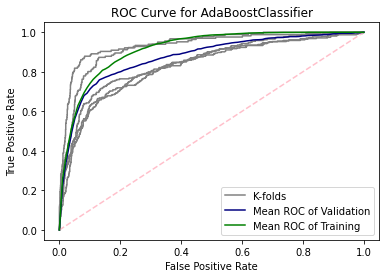

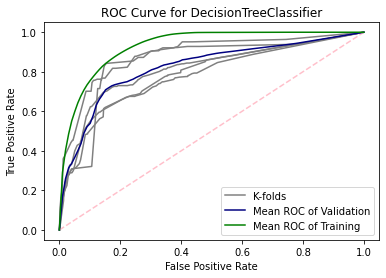

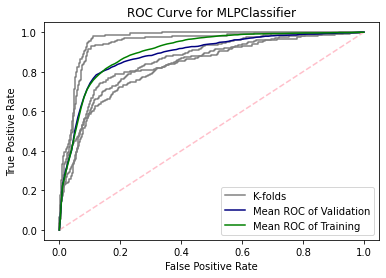

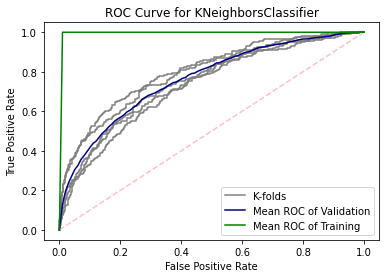

The best classifier is MLPClassifier(activation='logistic', hidden_layer_sizes=(20, 20, 20),
              max_iter=1500, n_iter_no_change=5) with AUC score of 0.8873679327562802


In [146]:
# run Cross_Validation on all classifiers.

classifiers = [AdaBoost_classifier, DecisionTree_classifier, ANN_classifier, KNN_classifier] # all classifiers

AUCs=[] # keeps AUC results for all classifiers
differences=[] # keep calculated differences between auc of train and validation

for c in classifiers:
    mean_auc_train, mean_auc_validation = Cross_Validation(train_set, c, 5) # apply Cross_Validation
    AUCs.append((c, mean_auc_validation))

    diff = np.abs(mean_auc_train - mean_auc_validation) # calculat difference
    differences.append((c, diff))

# find the best classifier based on auc score
best_classifier = AUCs[0][0]
best_score = AUCs[0][1]
for c,score in AUCs:
    if score > best_score:
        best_classifier = c
        best_score = score
        
print ('The best classifier is %s with AUC score of %s' %(best_classifier, best_score))

## Overfitting Check

In [152]:
# definition for overfitting: difference between AUC of training and validations is greater than or equale to 0.1.

for c,diff in differences:
    print('Classifier: %s' %c)
    print ('AUC score difference between training and validation: %s' %round(diff,3))
    if diff <= 0.05:
        print ('The model is not overfitted')
    else:
        print ('The model is overfitted')
    print('')

Classifier: AdaBoostClassifier(learning_rate=0.5, n_estimators=75)
AUC score difference between training and validation: 0.041
The model is not overfitted

Classifier: DecisionTreeClassifier(min_impurity_decrease=1e-05, min_samples_leaf=4,
                       min_samples_split=200)
AUC score difference between training and validation: 0.107
The model is overfitted

Classifier: MLPClassifier(activation='logistic', hidden_layer_sizes=(20, 20, 20),
              max_iter=1500, n_iter_no_change=5)
AUC score difference between training and validation: 0.016
The model is not overfitted

Classifier: KNeighborsClassifier(metric='euclidean', n_jobs=-1, n_neighbors=170,
                     weights='distance')
AUC score difference between training and validation: 0.232
The model is overfitted



# E - Prediction

In [186]:
# perform prediction with best classifier - MLP

# split target variable from the other variables
wo_target_variable = train_set.loc[:,~train_set.columns.isin(['purchase'])]
only_target_variable = train_set.loc[:,'purchase']

# fit classifier
best_classifier.fit(wo_target_variable,only_target_variable)

# predict 
prediction_probability = best_classifier.predict_proba(test_set)[:, 1]
prediction = pd.DataFrame({'prediction': prediction_probability})
prediction.to_csv('Submission_group_21.csv')

prediction.head(4)

,prediction
0,0.000403
1,0.010293
2,0.050829
3,0.487597
